In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#using label encoder to encode categorical columns like gender and geography and dropping unnecessary columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label1 = le.fit_transform(df['Geography'])
label2=le.fit_transform(df['Gender'])
df.drop("Geography", axis=1, inplace=True)
df.drop("RowNumber", axis=1, inplace=True)
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Gender", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)
df["Geography"] = label1
df["Gender"]=label2
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


In [7]:
#defining minmax scaling function and scaling the columns balance,creditscore,EstimatedSalary
def min_max_scaling(column):
    return (column-column.min())/(column.max()-column.min())

df['Balance']=min_max_scaling(df['Balance'])
df['EstimatedSalary']=min_max_scaling(df['EstimatedSalary'])
df['CreditScore']=min_max_scaling(df['CreditScore'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,0.538,42,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,2,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,0,1
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,0,1
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,0,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,1,1


In [8]:
import tensorflow as tf

2023-08-30 10:48:42.729978: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 10:48:42.758533: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 10:48:43.228770: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,0.538,42,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,2,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,0,1
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,0,1
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,0,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,1,1


In [11]:
df['Exit']=df['Exited']
df.drop('Exited',axis=1,inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender,Exit
0,0.538,42,2,0.000000,1,1,1,0.506735,0,0,1
1,0.516,41,1,0.334031,1,0,1,0.562709,2,0,0
2,0.304,42,8,0.636357,3,1,0,0.569654,0,0,1
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1,0
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1,0
9997,0.718,36,7,0.000000,1,0,1,0.210390,0,0,1
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,1,1


In [12]:
X = df.iloc[:, :10]
y = df.iloc[:, 10]

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,0.538,42,2,0.000000,1,1,1,0.506735,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,2,0
2,0.304,42,8,0.636357,3,1,0,0.569654,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1
9997,0.718,36,7,0.000000,1,0,1,0.210390,0,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,1


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exit, Length: 10000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=40)

In [17]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


2023-08-30 10:48:43.962932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 10:48:44.047387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 10:48:44.047772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

226/226 [==============================] - 3s 5ms/step - loss: 0.6415 - accuracy: 0.7853 - val_loss: 0.5113 - val_accuracy: 0.8165
Epoch 2/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.7880 - val_loss: 0.4772 - val_accuracy: 0.8165
Epoch 3/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5146 - accuracy: 0.7903 - val_loss: 0.4822 - val_accuracy: 0.8165
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.7903 - val_loss: 0.4782 - val_accuracy: 0.8165
Epoch 5/10
226/226 [==============================] - 1s 5ms/step - loss: 0.5151 - accuracy: 0.7903 - val_loss: 0.4786 - val_accuracy: 0.8165
Epoch 6/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5148 - accuracy: 0.7903 - val_loss: 0.4892 - val_accuracy: 0.8165
Epoch 7/10
226/226 [==============================] - 1s 5ms/step - loss: 0.5173 - accuracy: 0.7903 - val_loss: 0.4783 - val_accuracy: 0.8165
Epoch 8/10
226/22

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


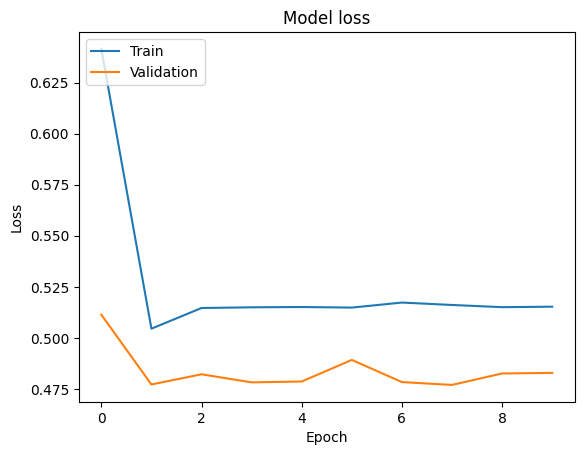

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1408      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 2s 5ms/step - loss: 0.5444 - accuracy: 0.7801 - val_loss: 0.4371 - val_accuracy: 0.8188
Epoch 2/

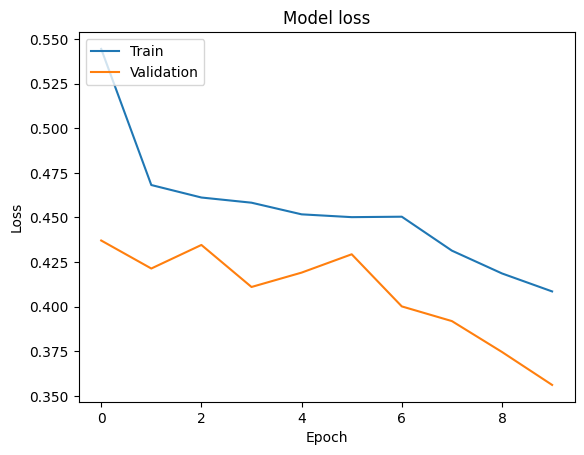

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1408      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 2s 5ms/step - loss: 0.5219 - accuracy: 0.7885 - val_loss: 0.4768 - val_accuracy: 0.8157
Epoch 2/

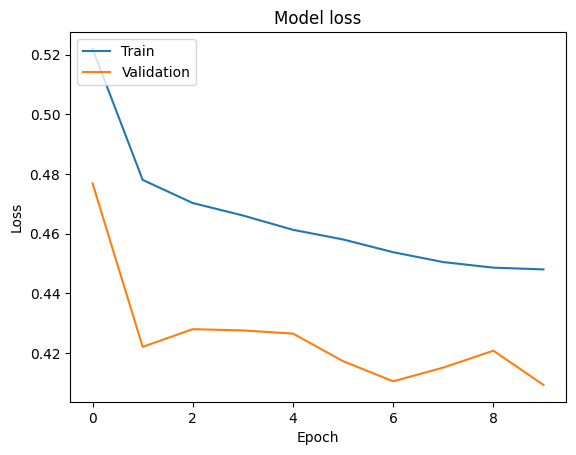

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1408      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 5ms/step - loss: 0.8552 - accuracy: 0.7828 - val_loss: 0.4777 - val_accuracy: 0.8165
Epoch 2/

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


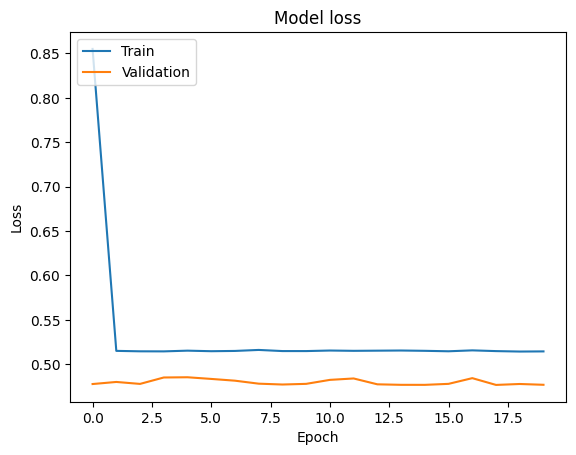

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1408      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 5ms/step - loss: 0.5170 - accuracy: 0.7866 - val_loss: 0.4515 - val_accuracy: 0.8165
Epoch 2/

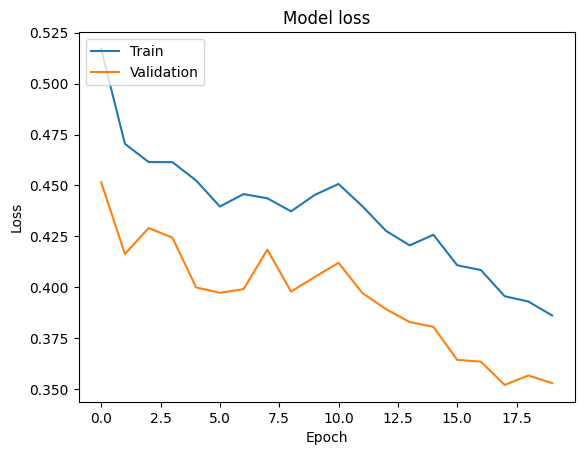

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1408      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 5ms/step - loss: 0.5185 - accuracy: 0.7898 - val_loss: 0.4900 - val_accuracy: 0.7992
Epoch 2/

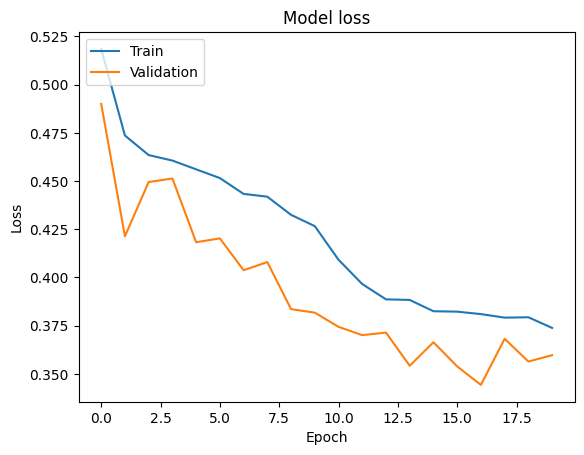

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1408      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 5ms/step - loss: 0.7940 - accuracy: 0.7826 - val_loss: 0.4911 - val_accuracy: 0.8165
Epoch 2/

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


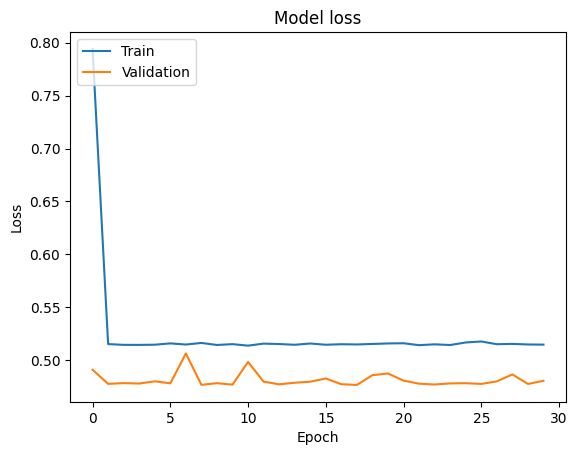

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               1408      
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 4ms/step - loss: 0.5317 - accuracy: 0.7870 - val_loss: 0.4325 - val_accuracy: 0.8290
Epoch 2/

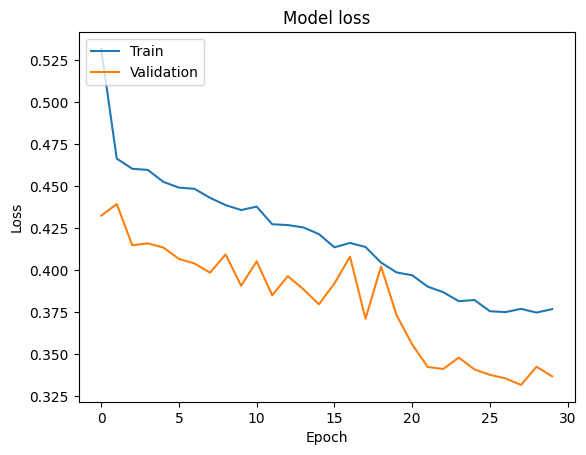

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1408      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 4ms/step - loss: 0.5646 - accuracy: 0.7787 - val_loss: 0.4623 - val_accuracy: 0.8282
Epoch 2/

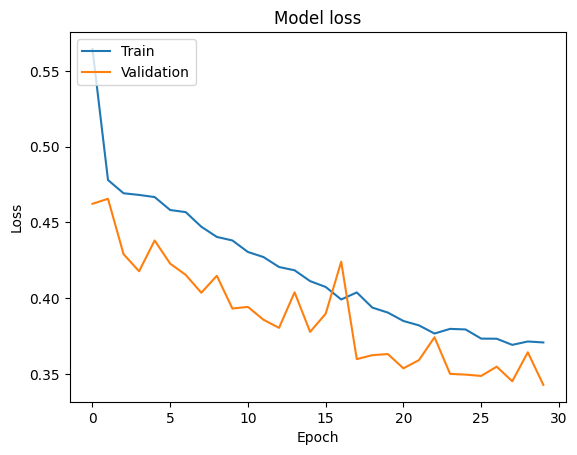

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1408      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 0)                 0         
                                                                 
 dense_39 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5189 - accuracy: 0.7903 - val_loss: 0.4782 - val_accuracy: 0.8165
Epoch 2/10

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


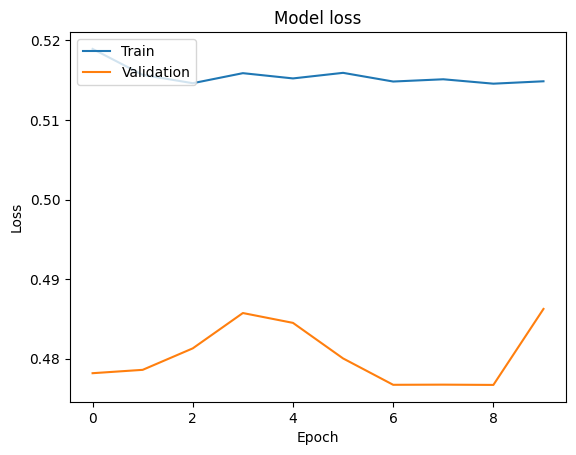

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               1408      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 0)                 0         
                                                                 
 dense_43 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 2s 4ms/step - loss: 0.5555 - accuracy: 0.7903 - val_loss: 0.4838 - val_accuracy: 0.8165
Epoch 2/1

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


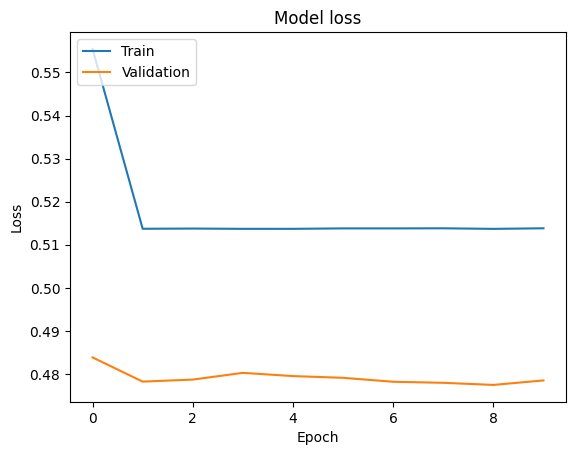

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               1408      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 0)                 0         
                                                                 
 dense_47 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 2s 4ms/step - loss: 0.6638 - accuracy: 0.7903 - val_loss: 0.6318 - val_accuracy: 0.8165
Epoch 2/1

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


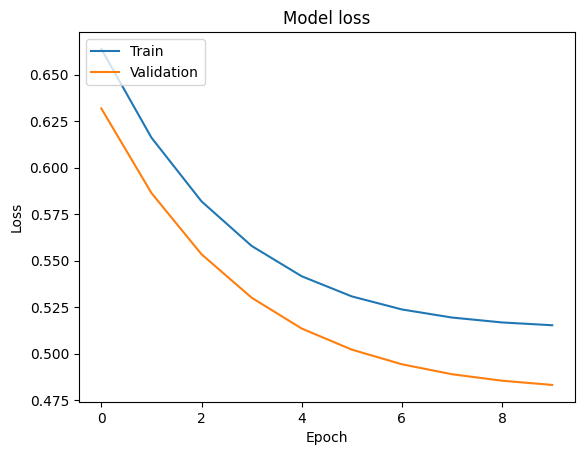

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               1408      
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dense_50 (Dense)            (None, 0)                 0         
                                                                 
 dense_51 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 4ms/step - loss: 0.5196 - accuracy: 0.7903 - val_loss: 0.4860 - val_accuracy: 0.8165
Epoch 2/2

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


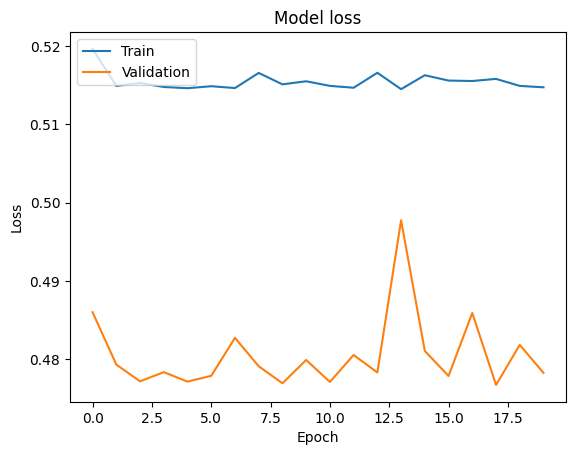

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               1408      
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 0)                 0         
                                                                 
 dense_55 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 5ms/step - loss: 0.5568 - accuracy: 0.7903 - val_loss: 0.4831 - val_accuracy: 0.8165
Epoch 2/2

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


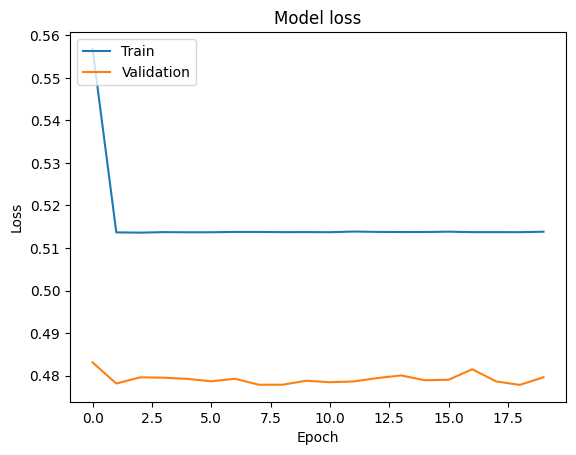

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1408      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 0)                 0         
                                                                 
 dense_59 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 4ms/step - loss: 0.6647 - accuracy: 0.7903 - val_loss: 0.6330 - val_accuracy: 0.8165
Epoch 2/2

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


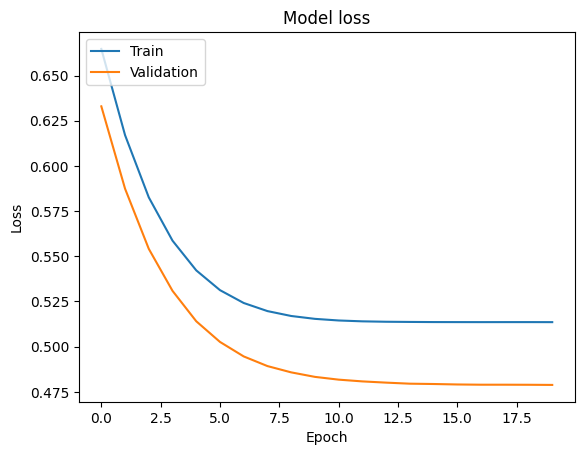

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               1408      
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 0)                 0         
                                                                 
 dense_63 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 4ms/step - loss: 0.5185 - accuracy: 0.7903 - val_loss: 0.4776 - val_accuracy: 0.8165
Epoch 2/3

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


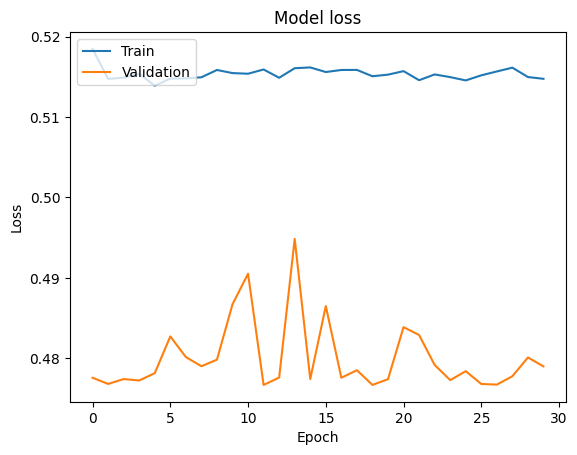

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               1408      
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 0)                 0         
                                                                 
 dense_67 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 4ms/step - loss: 0.5552 - accuracy: 0.7903 - val_loss: 0.4838 - val_accuracy: 0.8165
Epoch 2/3

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


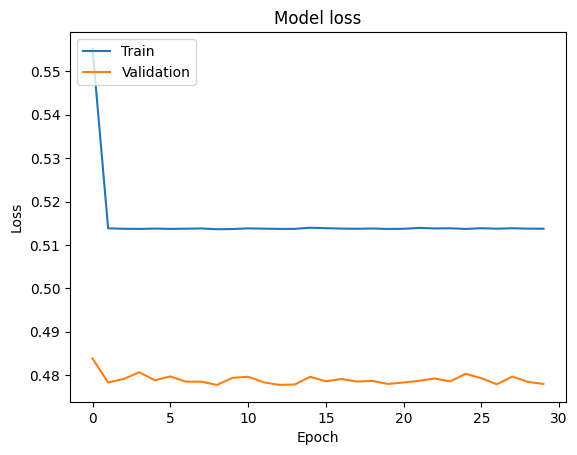

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               1408      
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dense_70 (Dense)            (None, 0)                 0         
                                                                 
 dense_71 (Dense)            (None, 1)                 1         
                                                                 
Total params: 9665 (37.75 KB)
Trainable params: 9665 (37.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 1s 4ms/step - loss: 0.6639 - accuracy: 0.7903 - val_loss: 0.6318 - val_accuracy: 0.8165
Epoch 2/3

/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


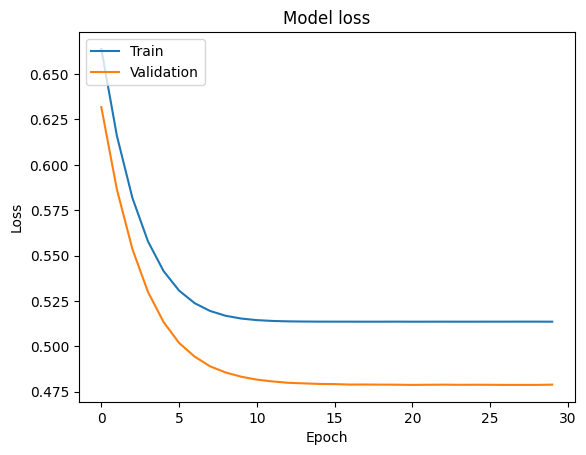

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 128)               1408      
                                                                 
 dense_73 (Dense)            (None, 0)                 0         
                                                                 
 dense_74 (Dense)            (None, 0)                 0         
                                                                 
 dense_75 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 2s 4ms/step - loss: 0.5191 - accuracy: 0.7903 - val_loss: 0.4794 - val_accuracy: 0.8165
Epoch 2/10


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


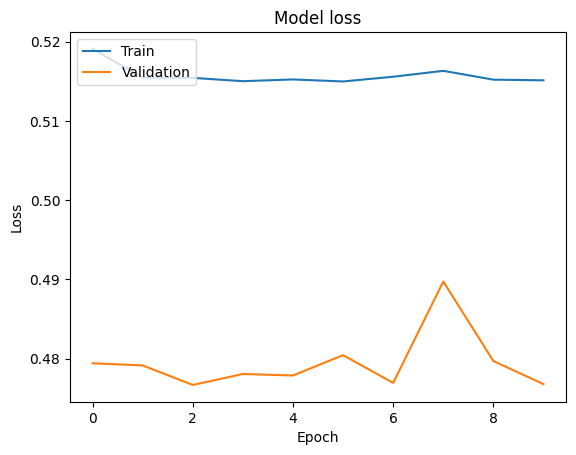

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               1408      
                                                                 
 dense_77 (Dense)            (None, 0)                 0         
                                                                 
 dense_78 (Dense)            (None, 0)                 0         
                                                                 
 dense_79 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5550 - accuracy: 0.7903 - val_loss: 0.4825 - val_accuracy: 0.8165
Epoch 2/10


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


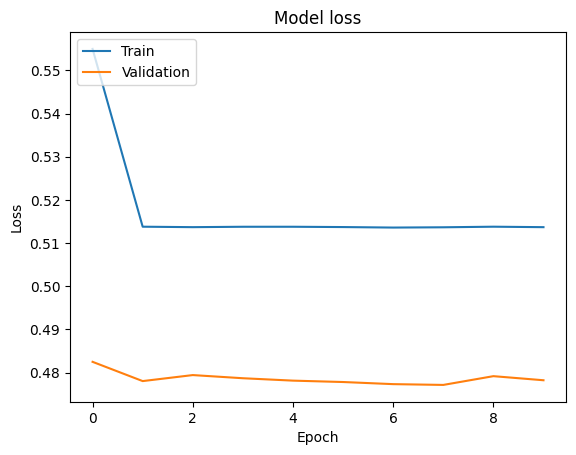

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 128)               1408      
                                                                 
 dense_81 (Dense)            (None, 0)                 0         
                                                                 
 dense_82 (Dense)            (None, 0)                 0         
                                                                 
 dense_83 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
226/226 [==============================] - 1s 4ms/step - loss: 0.6637 - accuracy: 0.7903 - val_loss: 0.6314 - val_accuracy: 0.8165
Epoch 2/10


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


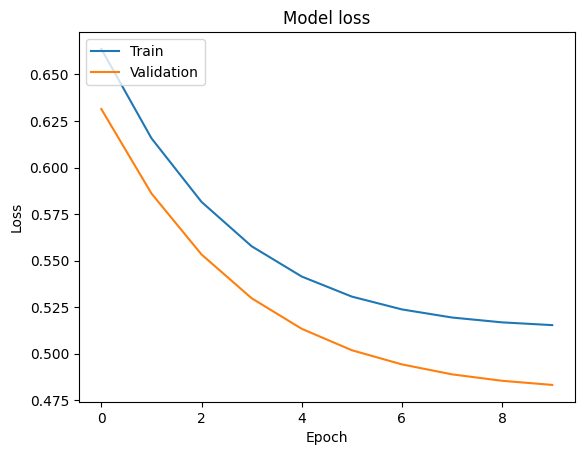

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 128)               1408      
                                                                 
 dense_85 (Dense)            (None, 0)                 0         
                                                                 
 dense_86 (Dense)            (None, 0)                 0         
                                                                 
 dense_87 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 4ms/step - loss: 0.5194 - accuracy: 0.7903 - val_loss: 0.4788 - val_accuracy: 0.8165
Epoch 2/20


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


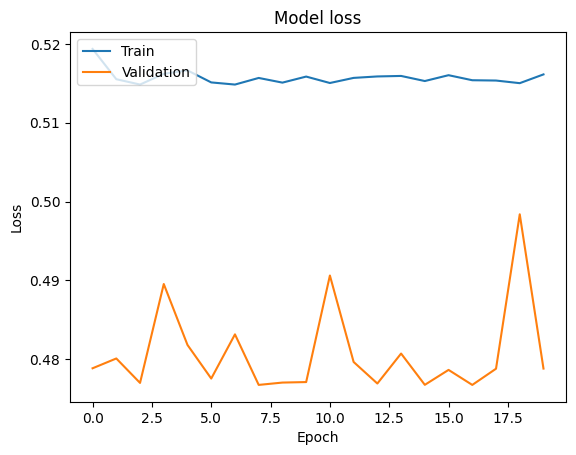

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 128)               1408      
                                                                 
 dense_89 (Dense)            (None, 0)                 0         
                                                                 
 dense_90 (Dense)            (None, 0)                 0         
                                                                 
 dense_91 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 2s 4ms/step - loss: 0.5582 - accuracy: 0.7903 - val_loss: 0.4836 - val_accuracy: 0.8165
Epoch 2/20


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


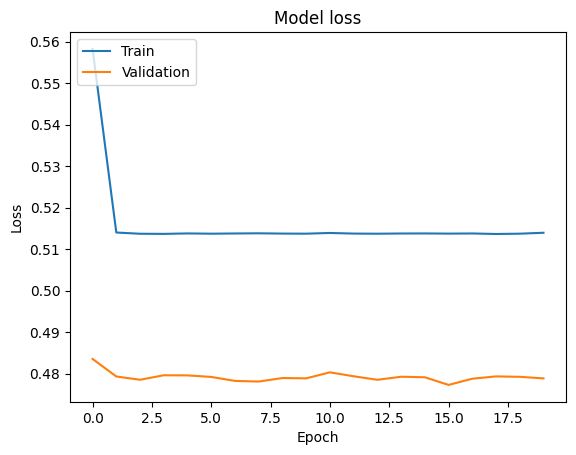

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 128)               1408      
                                                                 
 dense_93 (Dense)            (None, 0)                 0         
                                                                 
 dense_94 (Dense)            (None, 0)                 0         
                                                                 
 dense_95 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.7903 - val_loss: 0.6331 - val_accuracy: 0.8165
Epoch 2/20


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


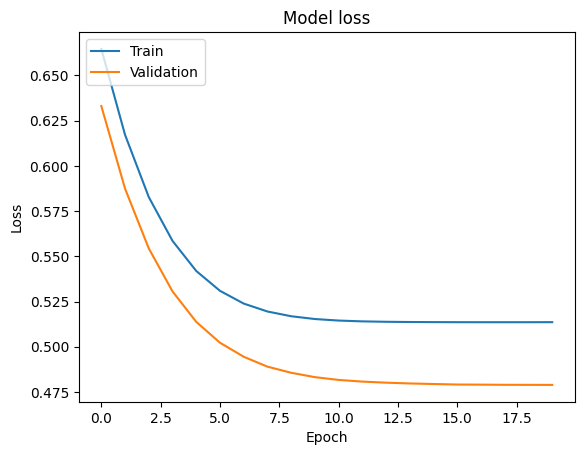

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128)               1408      
                                                                 
 dense_97 (Dense)            (None, 0)                 0         
                                                                 
 dense_98 (Dense)            (None, 0)                 0         
                                                                 
 dense_99 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 4ms/step - loss: 0.5204 - accuracy: 0.7903 - val_loss: 0.4833 - val_accuracy: 0.8165
Epoch 2/30


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


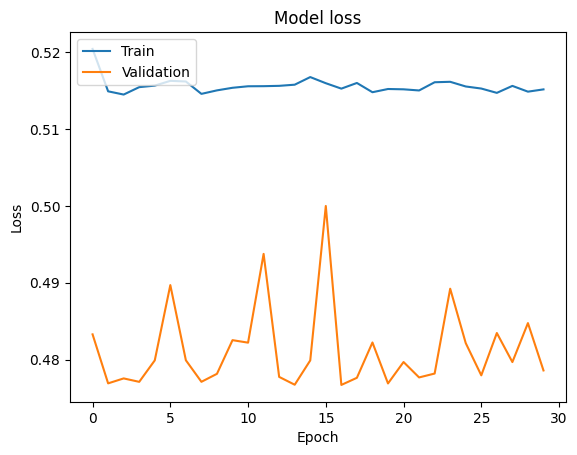

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 128)               1408      
                                                                 
 dense_101 (Dense)           (None, 0)                 0         
                                                                 
 dense_102 (Dense)           (None, 0)                 0         
                                                                 
 dense_103 (Dense)           (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 2s 4ms/step - loss: 0.5555 - accuracy: 0.7903 - val_loss: 0.4834 - val_accuracy: 0.8165
Epoch 2/30


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


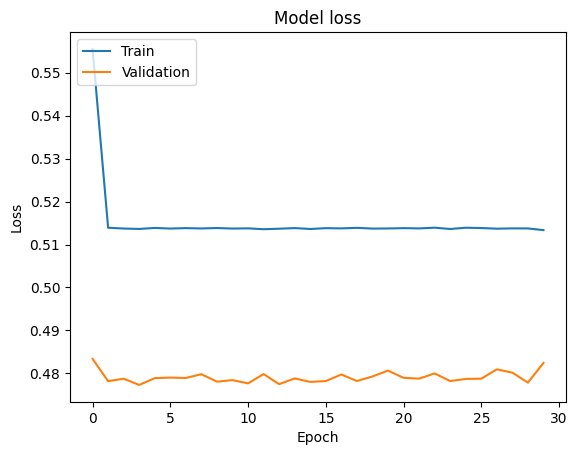

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 128)               1408      
                                                                 
 dense_105 (Dense)           (None, 0)                 0         
                                                                 
 dense_106 (Dense)           (None, 0)                 0         
                                                                 
 dense_107 (Dense)           (None, 1)                 1         
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
226/226 [==============================] - 1s 4ms/step - loss: 0.6643 - accuracy: 0.7903 - val_loss: 0.6321 - val_accuracy: 0.8165
Epoch 2/30


/home/mca/anaconda3/envs/dse/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


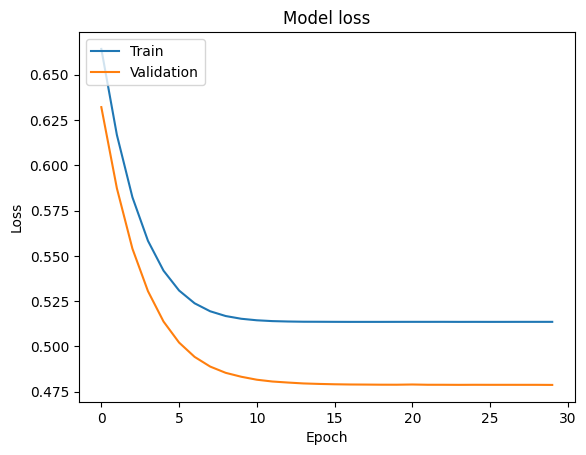

In [18]:
epochs =[10,20,30]
learning_rate =[0.1,0.01,0.001]
units_per_layer = [(128, 64, 32),(128,64,0),(128,0,0)]
# Initialize lists to store performance metrics
results = []

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []


for i in units_per_layer:
  for epoch in epochs:
    for lr in learning_rate:
        # Build the neural network model
        model = Sequential([
            Input(shape=X_train.shape[1]),
            Dense(i[0], activation='relu'),
            Dense(i[1], activation='relu'),
            Dense(i[2], activation='relu'),
            Dense(1, activation='sigmoid')
            ])
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy',metrics=["accuracy"])
        model.summary()
        # Train the model

        batch_size=32
        history=model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.15)
        y_test_pred = model.predict(X_test)
        y_test_pred = (y_test_pred > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)

        results.append([ i, epoch, lr, accuracy, precision, recall])



        fig=plt.figure()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()


In [20]:
columns = ['Units per Layer', 'Epochs', 'Learning Rate', 'Accuracy', 'Precision', 'Recall']
results= pd.DataFrame(results, columns=columns)
results


,Units per Layer,Epochs,Learning Rate,Accuracy,Precision,Recall
0,"(128, 64, 32)",10,0.100,0.808000,0.000000,0.000000
1,"(128, 64, 32)",10,0.010,0.846667,0.726562,0.322917
2,"(128, 64, 32)",10,0.001,0.824000,0.750000,0.125000
3,"(128, 64, 32)",20,0.100,0.808000,0.000000,0.000000
4,"(128, 64, 32)",20,0.010,0.848000,0.794118,0.281250
5,"(128, 64, 32)",20,0.001,0.842667,0.603175,0.527778
6,"(128, 64, 32)",30,0.100,0.808000,0.000000,0.000000
7,"(128, 64, 32)",30,0.010,0.858000,0.820513,0.333333
8,"(128, 64, 32)",30,0.001,0.862000,0.739645,0.434028
9,"(128, 64, 0)",10,0.100,0.808000,0.000000,0.000000
